# Titantic Dataset
**Author:** Brett Neely

**Date:** March 25, 2025  

**Introduction:** The purpose of this notebook is to use a model to predict the survival on the Titanic from various inpute features. There will be three classifications models employed in this notebook:
- Decision Tree Classifier
- Support Vector Machine
- Neural Network

### Section 1: Import The Dataset

In [22]:
# Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [2]:
# Load the dataset from Seaborn
titanic = sns.load_dataset('titanic')

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Section 2: Data Exploration and Preparation
#### 2.1 Handle Missing Values and Clean Data

In [3]:
# Impute missing values for age using the median
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [4]:
# Fill in missing values for embark_town using the mode:
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

#### 2.2 Feature Engineering

##### Create the following new features:
- family_size: number of family members on board
- convert "sex" to numeric
- convert "embarked" to numeric
- convert "alone" to numeric

In [5]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})
titanic['alone'] = titanic['alone'].astype(int)

### Section 3: Feature Selection and Justification

#### 3.1 Choose features and target
In the first part of this section, we are going to select 1-2 input features and use **survived** as the target. There will be three input cases for feature selection.

In [6]:
# First case with 1 input feature
X1 = titanic[['alone']]
y1 = titanic['survived']

# Second case with a different input feature (fare)
X2 = titanic[['fare']]
y2 = titanic['survived']

# Third case with age and family size as input features
X3 = titanic[['age', 'family_size']]
y3 = titanic['survived']

#### Section 3 Reflection
##### Why are these features selected?
These features are selected because they are numerical. Each feature could be a factor in whether a passenger survives or not.
##### Are there features that are likely to be highly predictive of survival?
I suspect those that had paid more in fare will be more predictive of survival than age.

### Section 4: Train a Classification Model (Decision Tree)
#### 4.1 Split the Data into training and tests sets using StratifiedShuffleSplit for even class distribution

In [7]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X1, y1):
    X_train = X1.iloc[train_indices]
    X_test = X1.iloc[test_indices]
    y_train = y1.iloc[train_indices]
    y_test = y1.iloc[test_indices]

print('Train size: ', len(X_train), 'Test size: ', len(X_test))

Train size:  712 Test size:  179


#### 4.2 Create and Train Decision Tree Model

In [8]:
# Evaluate model performance on training data
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### 4.3 Predict and Evaluate Model Performance

In [9]:
y_pred = tree_model.predict(X_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y_train, y_pred))

Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       439
           1       0.50      0.51      0.51       273

    accuracy                           0.62       712
   macro avg       0.60      0.60      0.60       712
weighted avg       0.62      0.62      0.62       712



In [10]:
# Evaluate model performance on test data
y_test_pred = tree_model.predict(X_test)
print("Results for Decision Tree on test data:")
print(classification_report(y_test, y_test_pred))

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



#### 4.4 Confusion Matrix (Heatmap)

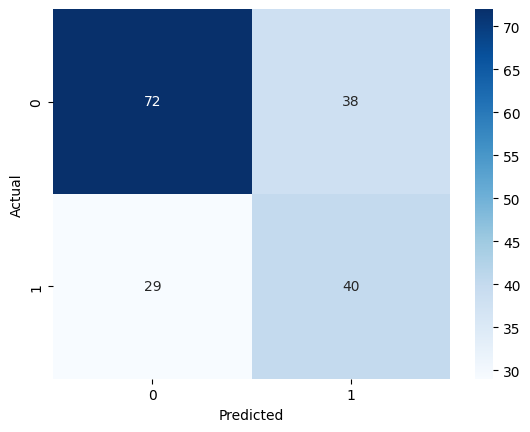

In [11]:
# Plot a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 4.5 Decision Tree Plot

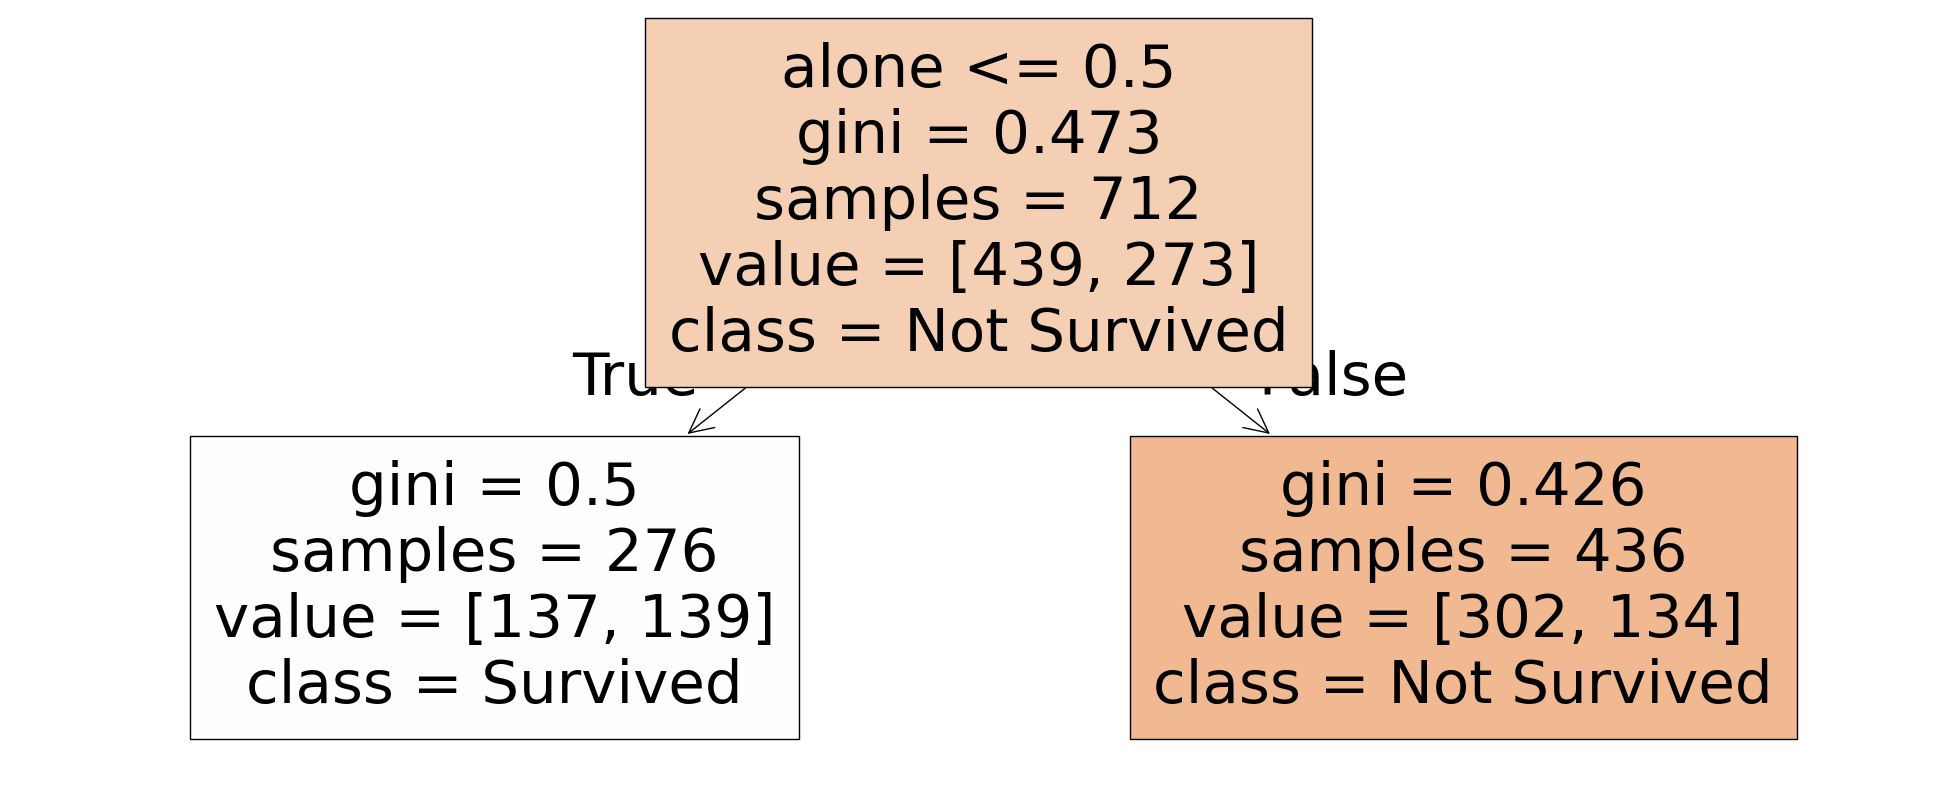

In [12]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X1.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_1.png")

#### 4.6 Repeat sections 4.1-4.5 for Case 2 from Section 3.1

In [13]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X2, y2):
    X2_train = X2.iloc[train_indices]
    X2_test = X2.iloc[test_indices]
    y2_train = y2.iloc[train_indices]
    y2_test = y2.iloc[test_indices]

print('Train size: ', len(X2_train), 'Test size: ', len(X2_test))

tree_model = DecisionTreeClassifier()
tree_model.fit(X2_train, y2_train)

y2_pred = tree_model.predict(X2_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y2_train, y2_pred))

y2_test_pred = tree_model.predict(X2_test)
print("Results for Decision Tree on test data:")
print(classification_report(y2_test, y2_test_pred))

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       439
           1       0.90      0.59      0.71       273

    accuracy                           0.82       712
   macro avg       0.84      0.77      0.79       712
weighted avg       0.83      0.82      0.81       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       110
           1       0.58      0.48      0.52        69

    accuracy                           0.66       179
   macro avg       0.64      0.63      0.63       179
weighted avg       0.66      0.66      0.66       179



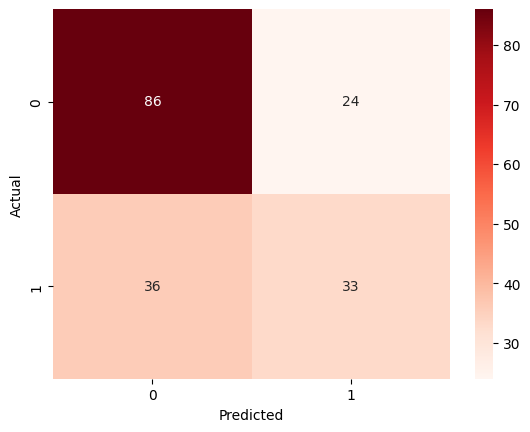

In [14]:
# Plot a confusion matrix
cm = confusion_matrix(y2_test, y2_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

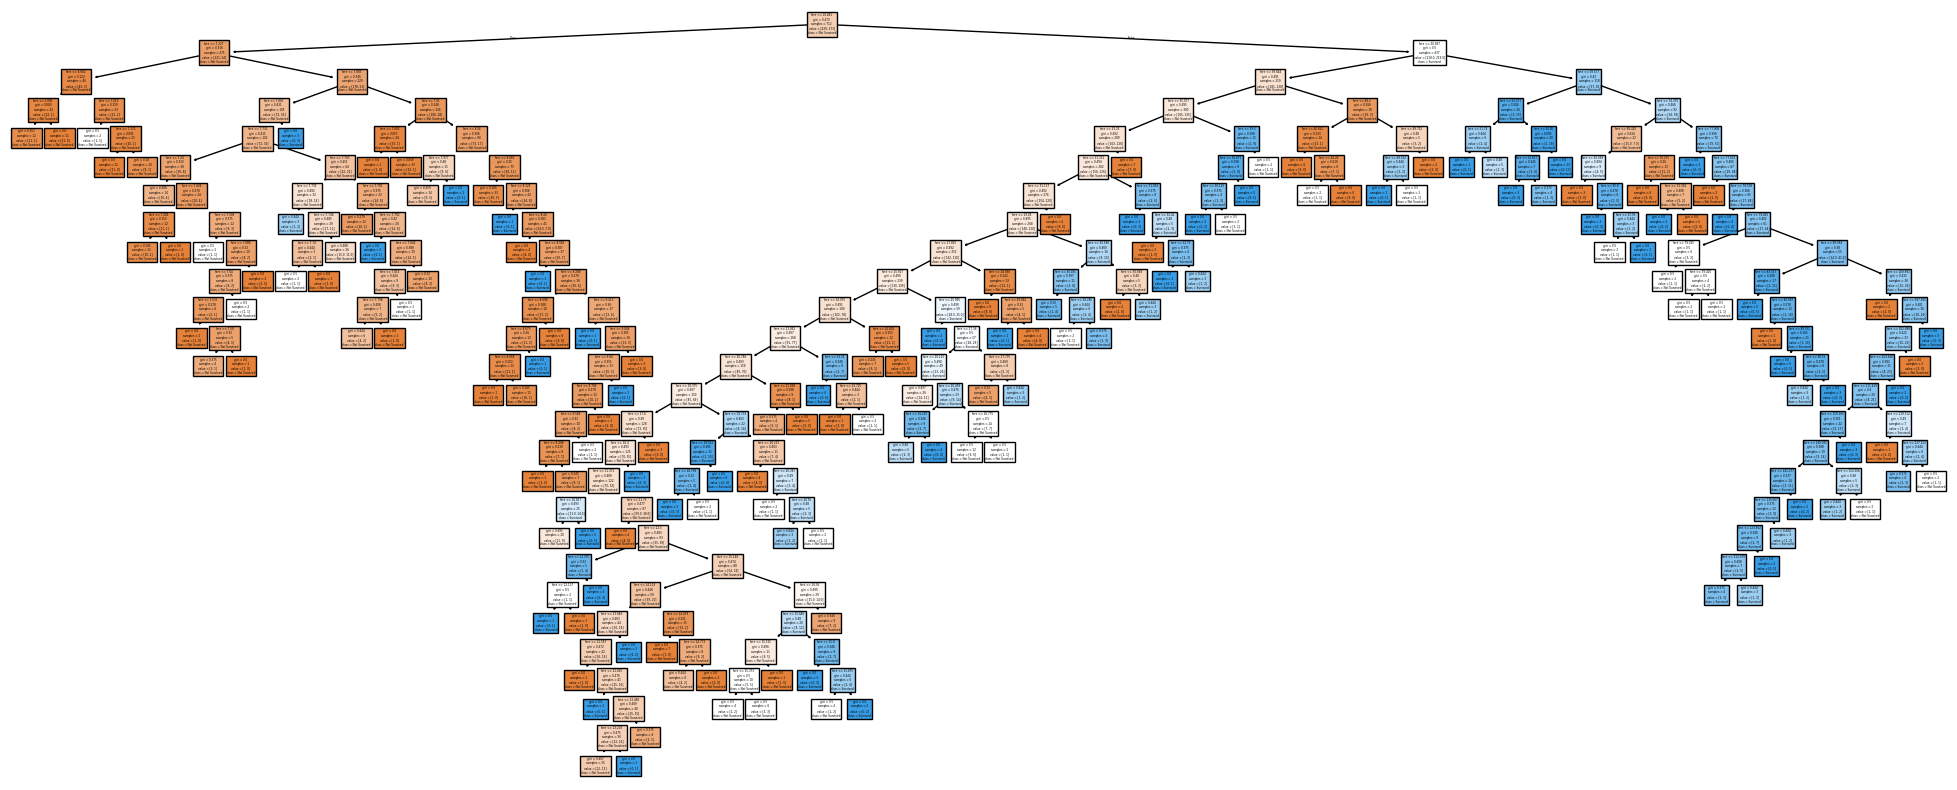

In [15]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X2.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_2.png")

#### 4.7 Repeat sections 4.1-4.5 for Case 3 from Section 3.1

In [16]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X3, y3):
    X3_train = X3.iloc[train_indices]
    X3_test = X3.iloc[test_indices]
    y3_train = y3.iloc[train_indices]
    y3_test = y3.iloc[test_indices]

print('Train size: ', len(X3_train), 'Test size: ', len(X3_test))

tree_model = DecisionTreeClassifier()
tree_model.fit(X3_train, y3_train)

y3_pred = tree_model.predict(X3_train)  
print("Results for Decision Tree on training data:")  
print(classification_report(y3_train, y3_pred))

y3_test_pred = tree_model.predict(X3_test)
print("Results for Decision Tree on test data:")
print(classification_report(y3_test, y3_test_pred))

Train size:  712 Test size:  179
Results for Decision Tree on training data:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       439
           1       0.77      0.56      0.65       273

    accuracy                           0.77       712
   macro avg       0.77      0.73      0.74       712
weighted avg       0.77      0.77      0.76       712

Results for Decision Tree on test data:
              precision    recall  f1-score   support

           0       0.65      0.75      0.69       110
           1       0.46      0.35      0.40        69

    accuracy                           0.59       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.57      0.59      0.58       179



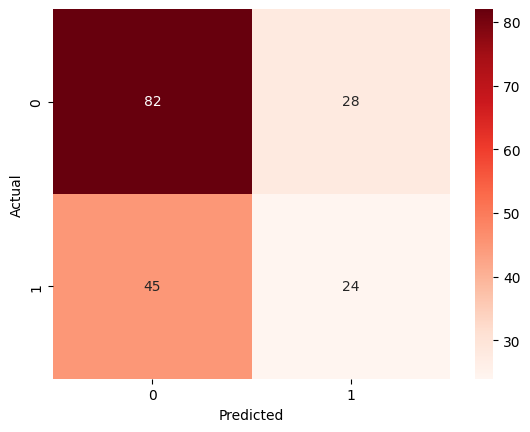

In [17]:
# Plot a confusion matrix
cm = confusion_matrix(y3_test, y3_test_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

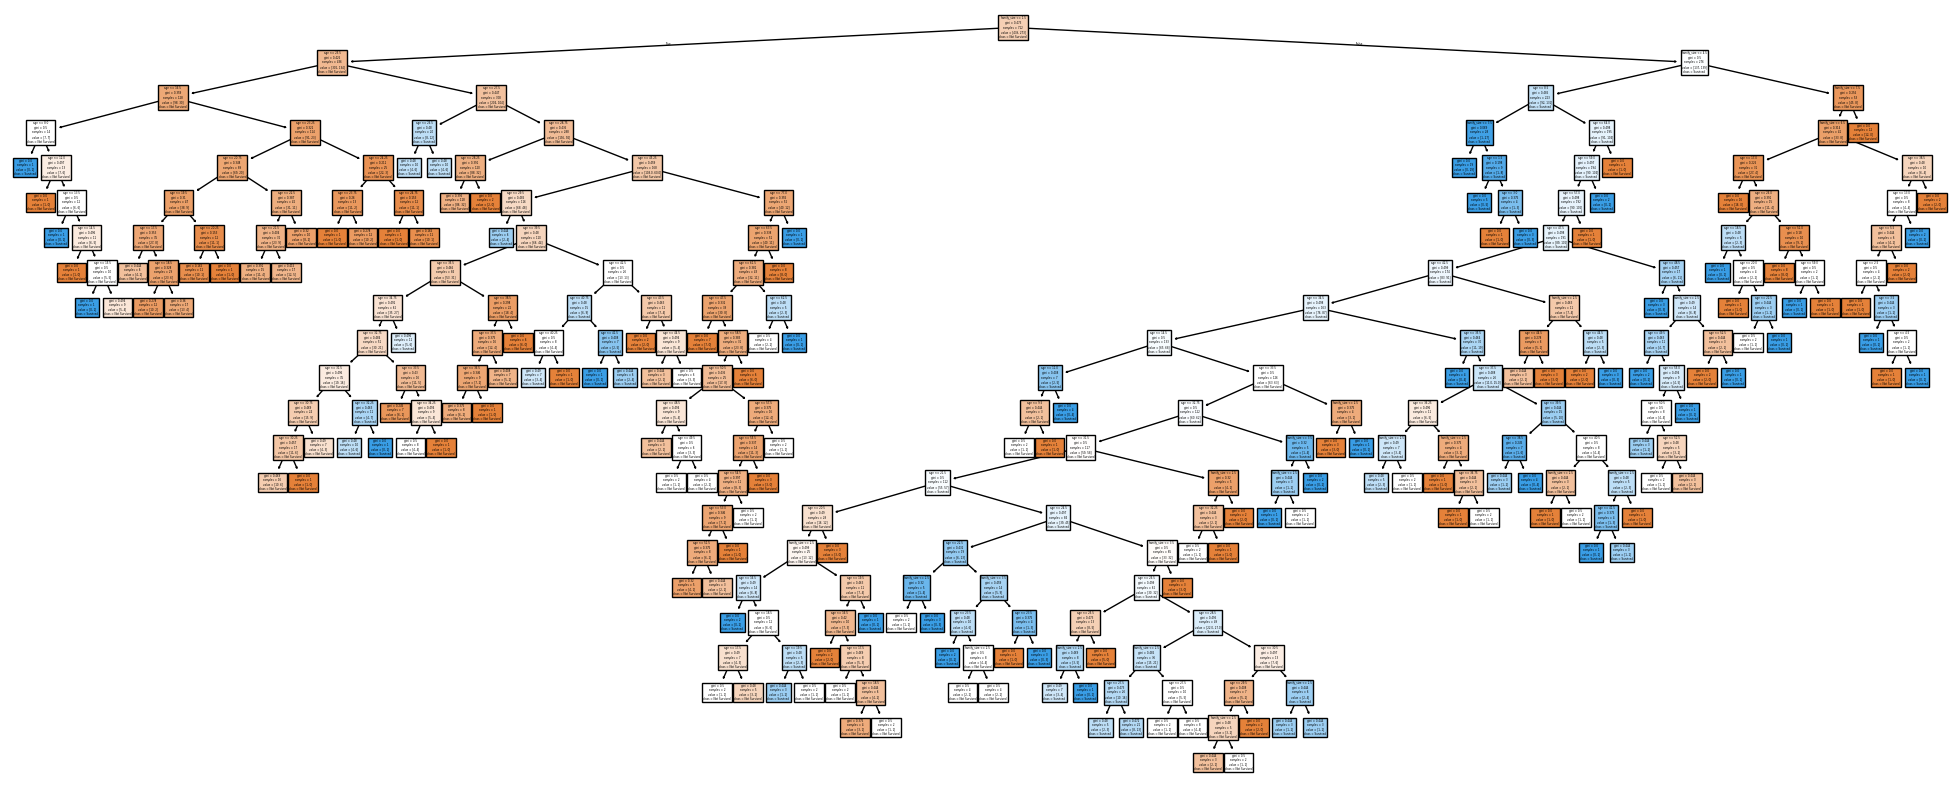

In [18]:
fig = plt.figure(figsize=(25,10))
plot_tree(tree_model, feature_names=X3.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()
fig.savefig("decision_tree_titanic_case_3.png")

#### Section 4 Reflection
##### **How well did the cases perform?**
- Case 1 (alone) had 62% accuracy
- Case 2 (fare) had 66% accuracy
- Case 3 (age + family_size) had 59% accuracy
##### **Are there any surprising results?**
It is surprising that case 3 had lower accuracy with more input features. However this may also indicate that those input features combined are not a good predictor for survival.
##### **Which inputs worked better?**
The fare input feature was the most accurate predictor of survival.

### Section 5: Alternative Models
#### 5.1 Train and Evaluate Model: Support Vector Machine

In [19]:
# Train SV model using default kernel: Radial Basis Function Kernel - most commonly used as it handles non-linear data well
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [20]:
# Predict and evaluate the SVC Model
y_pred_svc = svc_model.predict(X_test)

print("Results for SVC on test data:")
print(classification_report(y_test, y_pred_svc))

Results for SVC on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



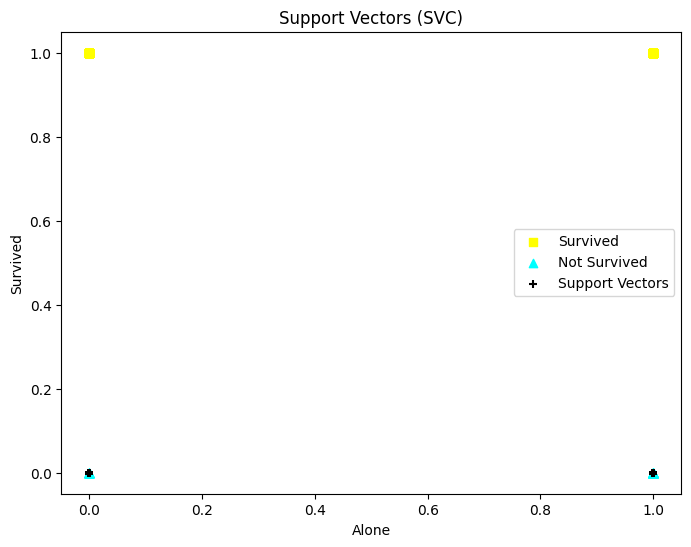

In [21]:
# Visualize the Support Vectors with Matplotlib

# Create data for charting - input target yes and input target no
survived_alone = X_test.loc[y_test == 1, 'alone']
not_survived_alone = X_test.loc[y_test == 0, 'alone']

# Create scatter plot for survived and not survived
plt.figure(figsize=(8, 6))
plt.scatter(survived_alone, y_test.loc[y_test == 1], c='yellow', marker='s', label='Survived')
plt.scatter(not_survived_alone, y_test.loc[y_test == 0], c='cyan', marker='^', label='Not Survived')

# Add support vectors (if available)
if hasattr(svc_model, 'support_vectors_'):
    support_x = svc_model.support_vectors_[:, 0]  # First feature (alone)
    support_y = svc_model.support_vectors_[:, 1] if svc_model.support_vectors_.shape[1] > 1 else None
    
    # Plot support vectors
    if support_y is not None:
        plt.scatter(support_x, support_y, c='black', marker='+', label='Support Vectors')
    else:
        plt.scatter(support_x, [0] * len(support_x), c='black', marker='+', label='Support Vectors')

# Add labels and legend
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.legend()
plt.title('Support Vectors (SVC)')
plt.show()

#### 5.2 Train and Evaluate Model: Neural Network - Multi Level Perceptron

In [23]:
# Train neural network
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X_train, y_train) 

MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')

In [24]:
# Predict and evaluate Neural Network Model:
y_pred_nn = nn_model.predict(X_test)

print("Results for Neural Network on test data:")
print(classification_report(y_test, y_pred_nn))

Results for Neural Network on test data:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       110
           1       0.51      0.58      0.54        69

    accuracy                           0.63       179
   macro avg       0.61      0.62      0.61       179
weighted avg       0.64      0.63      0.63       179



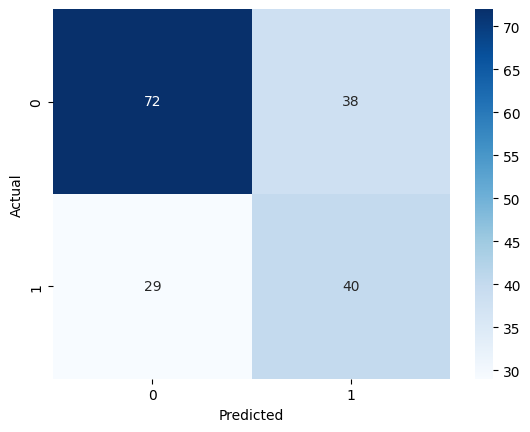

In [25]:
# Plot confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Section 5 Reflection
##### **How did each model perform?**
- The SVC RBF Kernel had 63% accuracy
- The NN MLP also had 63% accuracy
##### **Are there any suprising results?**
Both models had the same statistics for the alone input feature. I reran the results and it consisted. I found this to be surprising.
##### **Why might one model outperform the others?**
A neural network can model complex relationships better than an SVC with the default kernel which is one reason why a NN might outperform an SVC.
An SVC might outperform a neural network when there is less data. Neural networks require large amounts of data to be most effective.

### Section 6: Final Thoughts and Insights
#### 6.1 Summarize Findings
All 4 input features: age, fare, alone, and family_size were solid predictors of surival. However the decision tree and neural network models overfit the training data.
#### 6.2 Discuss Challenges Faced
Some challenges faced included relatively small sample of data for a neural network to be truly effective.
The SVC model also has four available kernels which will have different outputs but may be dataset dependent.
#### 6.3 Next Steps
Next steps could include testing more input features. Some examples include: pclass, sex, and other features that could be generated from feature engineering.